### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')


In [3]:
pd.set_option('display.max_columns', None)
data.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


2. Investigate the dataset for missing or problematic data.

In [5]:
#Look for null values, car is missing 12,576 of the 12,684 records, consider dropping
data.isnull().sum()


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [129]:
#Count the number of each value and determine need for data cleansing

#data['destination'].value_counts() #25, 25, 50 split
#data['passanger'].value_counts() # Alone dominant, good split
#data['weather'].value_counts() #80% sunny, fair split
#data['temperature'].value_counts() # 80 dominant ~64%, good split
#data['time'].value_counts() #good division
#data['coupon'].value_counts() # good split
#data['expiration'].value_counts() # 56% 1d
#data['gender'].value_counts() #even distribution, slightly female dominante 52%
#data['age'].value_counts() # even distribution, may change 50plus to 50 amd below 21 to 20 for correlations
#data['maritalStatus'].value_counts() #  may consider adding divorced and widowed as other
#data['has_children'].value_counts() # 59% does not have children
#data['education'].value_counts() # good distribution
#data['occupation'].value_counts() # 25 types of values here, may consider adding a category column to reduce, healthcare, not working, blue collar
#data['income'].value_counts() # may consider adding a column as the salary base to correlate
data['Bar'].value_counts() # good distribution, consider numericals for correlations
#data['CoffeeHouse'].value_counts() ## good distribution
#data['CarryAway'].value_counts() ## good distribution
#data['RestaurantLessThan20'].value_counts() #  good distribution
#data['Restaurant20To50'].value_counts() #  good distribution
#data['toCoupon_GEQ5min'].value_counts() # consider dropping, all within 5 minutes by design
#data['toCoupon_GEQ25min'].value_counts() # 90% no
#data['toCoupon_GEQ15min'].value_counts() # ~57 within 15
#data['direction_same'].value_counts() # opposite direction dominate at 79%. Duplicative information with direction_opp, but consider leaving for labeling
#data['direction_opp'].value_counts() # 
#data['Y'].value_counts() #good split, yes dominate ~58%, change to redeemed for labeling


Bar
never    5178
less1    3438
1~3      2468
4~8      1071
gt8       348
Name: count, dtype: int64

In [6]:
#Look for duplicated data
data.duplicated().sum()

74

In [7]:
#Review duplicates data
data[data.duplicated()]


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
4192,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,0,Associates degree,Unemployed,Less than $12500,NaN,less1,never,1~3,less1,less1,1,1,1,0,1,1
4236,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,0,Graduate degree (Masters or Doctorate),Management,$25000 - $37499,NaN,4~8,gt8,gt8,4~8,less1,1,1,1,0,1,1
4280,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,26,Single,0,Bachelors degree,Education&Training&Library,$50000 - $62499,NaN,1~3,never,4~8,1~3,less1,1,1,1,0,1,1
4324,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,46,Single,0,Some college - no degree,Protective Service,$25000 - $37499,NaN,1~3,never,4~8,1~3,1~3,1,1,1,0,1,1
4409,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,21,Single,0,Bachelors degree,Life Physical Social Science,$37500 - $49999,NaN,less1,never,less1,1~3,never,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,Home,Alone,Sunny,80,6PM,Bar,2h,Male,46,Married partner,1,Graduate degree (Masters or Doctorate),Management,$87500 - $99999,NaN,less1,1~3,1~3,less1,1~3,1,0,0,1,0,1
8512,Home,Partner,Sunny,30,10PM,Carry out & Take away,2h,Male,46,Married partner,1,Graduate degree (Masters or Doctorate),Management,$87500 - $99999,NaN,less1,1~3,1~3,less1,1~3,1,1,0,0,1,1
8513,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Male,46,Married partner,1,Graduate degree (Masters or Doctorate),Management,$87500 - $99999,NaN,less1,1~3,1~3,less1,1~3,1,1,1,0,1,0
8515,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Male,46,Married partner,1,Graduate degree (Masters or Doctorate),Management,$87500 - $99999,NaN,less1,1~3,1~3,less1,1~3,1,1,1,0,1,0


3. Decide what to do about your missing data -- drop, replace, other...

In [8]:
data = data.drop_duplicates()
#len (data)

In [9]:
#Add new integer of maxed employment based columns to sort values and add to correlation matrix


def Income_As_Integer(income):
    if income == 'Less than $12500':
        return 6250
    elif income == '$12500 - $24999':
        return 24999
    elif income == '$25000 - $37499':
        return 31250
    elif income == '$37500 - $49999':
        return 43750
    elif income == '$50000 - $62499':
        return 56250
    elif income == '$62500 - $74999':
        return 68750    
    elif income == '$75000 - $87499':
        return 81250
    elif income == '$87500 - $99999':
        return 93750
    elif income == '$100000 or More':
        return 150000
    else:
        return 0
        
data['Middle_Range_Income'] = data['income'].apply(Income_As_Integer)
#data.head(100)

In [16]:
#Add new integer to make age a value and add to correlation matrix


def Age_As_Integer(age):
    if age == '21':
        return 21
    elif age == '26':
        return 26
    elif age == '31':
        return 31
    elif age == '36':
        return 36
    elif age == '41':
        return 41
    elif age == '46':
        return 46  
    elif age == '50plus':
        return 50
    elif age == 'below21':
        return 18
    else:
        return 0
        
data['Age_Integer'] = data['age'].apply(Age_As_Integer)


In [15]:
#Create age as a decade

def Age_As_Decade(age):
    if age == '21':
        return 'Twenties'
    elif age == '26':
        return 'Twenties'
    elif age == '31':
        return 'Thirties'
    elif age == '36':
        return 'Thirties'
    elif age == '41':
        return 'Forties'
    elif age == '46':
        return 'Forties'
    elif age == '50plus':
        return 'Fifties Plus'
    elif age == 'below21':
        return 'Younger than 21'
    else:
        return 'Unknown'
        
data['Age_Decade'] = data['age'].apply(Age_As_Decade)

In [14]:
#drop data from car column as data is all homogeneous
del data['car']
#datacleaned.head(100)

4. What proportion of the total observations chose to accept the coupon? 



In [143]:
#drivers that accepted a coupon as percent of total
len(data.query('Y == 1'))/len(data)

0.5675654242664552

In [144]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Middle_Range_Income,Age_Integer
count,12610.000000,12610.000000,12610.0,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000
mean,63.267248,0.414512,1.0,0.559794,0.116019,0.215543,0.784457,0.567565,59782.765662,32.200000
std,19.153386,0.492657,0.0,0.496432,0.320260,0.411215,0.411215,0.495434,42465.283882,10.298093
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,6250.000000,18.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,31250.000000,21.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000,43750.000000,31.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000,81250.000000,41.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,150000.000000,50.000000


5. Use a bar plot to visualize the `coupon` column.

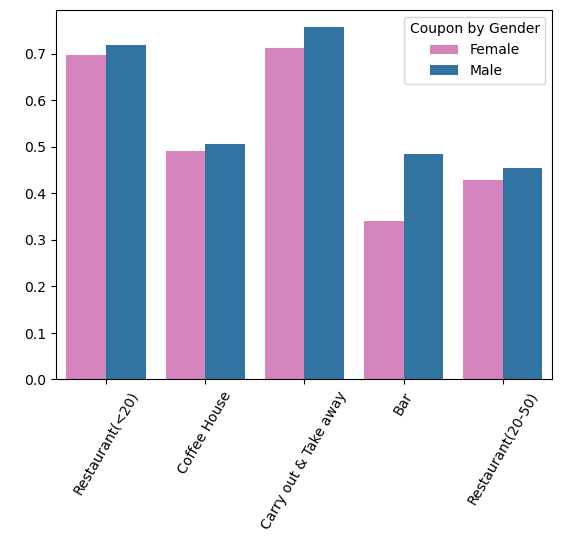

In [48]:
p = sns.barplot(data, x='coupon', y='Y', hue = 'gender', errorbar=None, palette = ['tab:pink', 'tab:blue'])
p.set(xlabel='Type of Coupon', ylabel=' ')
p.set_ylabel(" ", fontsize=6)
p.set_xlabel("", fontsize=1.5)
plt.legend(title='Coupon by Gender')
plt.xticks(rotation = 60)
plt.show()

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Total Records by Temperature')

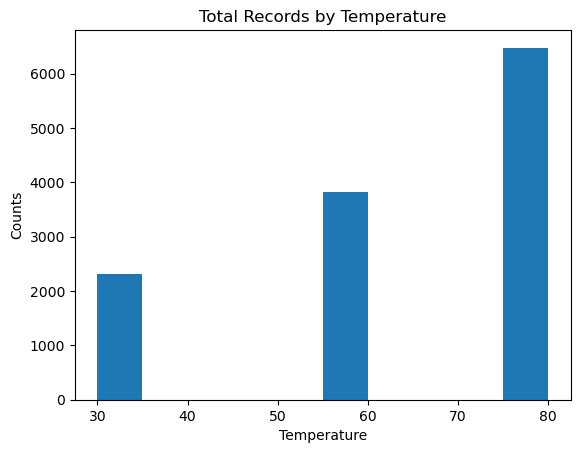

In [56]:
plt.hist(data['temperature'])
plt.xlabel('Temperature')
plt.ylabel('Counts')
plt.title('Total Records by Temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [142]:
#DataBarCoupons = data.query('Y == 1')
len(DataBarCoupons)
#len(data.query('Bar == [ "1~3", "less1", "4~8", "gt8"]'))


7157

2. What proportion of bar coupons were accepted?


In [149]:
len(data.query('Bar != ["never"] & Y == 1'))

4406

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [124]:
 #Those that went to a bar 3 or fewer times
len(data.query('Bar == ["never", "1~3", "less1"]'))/len(data)

0.87898493259318

In [125]:
 #Those that went to a bar more than 3
len(data.query('Bar == [ "4~8", "gt8"]'))/len(data)

0.11252973830293418

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [99]:
len(data.query('Bar == [ "1~3", "4~8", "gt8"] & Age_Integer > 25') )/len(data)

0.21942902458366376

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [105]:
len(data.query('Bar == [ "1~3", "4~8", "gt8"] & passanger == ["Friend(s)", "Partner"] & occupation != "Farming Fishing & Forestry"') )/len(data)

0.11213322759714513

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [107]:
len(data.query('Bar == [ "1~3", "4~8", "gt8"] & passanger == ["Friend(s)", "Partner"] & maritalStatus != "Widowed"') )/len(data)

0.11213322759714513

In [122]:
len(data.query('Bar == [ "1~3", "4~8", "gt8"] & Age_Integer <30') )/len(data)

0.17969865186360032

In [128]:
len(data.query('Middle_Range_Income < 50000 & RestaurantLessThan20 == ["4~8", "gt8"]') )/len(data)

0.17993655828707375

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [126]:
Hypothesis_BarCoupons = ''
Hypothesis_BarCoupons = 'Drivers who visit a bar 4 or more times are the most likely to accept a bar coupon.'

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  